<a href="https://colab.research.google.com/github/prasanna-26/Titanic_Survival_Prediction/blob/main/Titanic_Survival_Prediction_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
 #Titanic Survival Prediction

In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Loading Titanic dataset through URL
titanic_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

# Load the Titanic dataset
train_df = pd.read_csv(titanic_url)

# Display basic information about the dataset
train_df.info()
train_df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
# Loading Titanic dataset through URL to ensure a fresh DataFrame
titanic_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
train_df = pd.read_csv(titanic_url)

# Handling missing values
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
train_df.drop(columns=['Cabin'], inplace=True)

# Label Encoding for 'Sex'
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

# One-hot Encoding for 'Embarked'
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)

# Feature Scaling for the continuous variables
scaler = StandardScaler()
train_df[['Age', 'Fare']] = scaler.fit_transform(train_df[['Age', 'Fare']])

# Define features (X) and target (y)
X = train_df.drop(columns=['Survived', 'Name', 'Ticket'])
y = train_df['Survived']

In [39]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
#Now Training multiple models:

# 1. Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


# 2. Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


# 3. Support Vector Classifier Model
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))


Logistic Regression Accuracy: 0.8044692737430168
Random Forest Accuracy: 0.8379888268156425
SVC Accuracy: 0.7821229050279329


                 Model  Accuracy
0  Logistic Regression  0.804469
1        Random Forest  0.837989
2                  SVC  0.782123


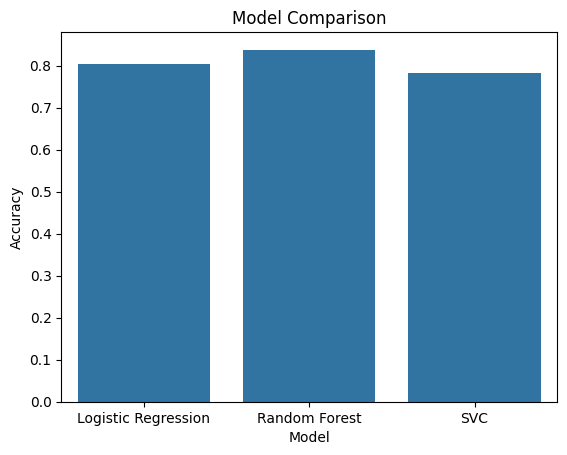

In [41]:
# Now, comparing accuracy of all the models through the graph
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVC'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svc)]
})
print(model_comparison)

# Visualize the comparison
sns.barplot(x='Model', y='Accuracy', data=model_comparison)
plt.title("Model Comparison")
plt.show()
